**1. Data Understanding**

In [ ]:

import pandas as pd

#Data Understanding
# Load the dataset
data = pd.read_excel('/content/Data in Brief.xlsx')
data.head()


,Name,Filing Date,Sued,Sued (including acquirer class actions),Head-quarter,Circuit,StandingDenied,Listed,Industry,NonBiz,Types of Data Breach,Hacking,Payment,CreditMonitor,pre-Clapper,post-Spokeo,Injured,LogInjured
0,"International Association of Sheet Metal, et al.",2016-12-30,0,0,PA,3,1.0,0,Nonprofit,1,disclosure,0,0,1.0,0,1,NaN,NaN
1,Graphik Dimensions Ltd.,2016-12-28,0,0,NC,4,1.0,0,eCommerce,0,hacking,1,0,0.0,0,1,NaN,NaN
2,"The Topps Company, Inc.",2016-12-27,0,0,NY,2,1.0,0,eCommerce,0,hacking,1,0,1.0,0,1,NaN,NaN
3,FriendFinder Networks Inc.,2016-12-23,0,0,CA,9,0.0,0,Online,0,hacking,1,0,0.0,0,1,412214295.0,8.615123
4,Claremont University Consortium,2016-12-22,0,0,CA,9,0.0,0,Education,1,theft/burglary,0,0,1.0,0,1,NaN,NaN


In [ ]:
# Display basic information about the dataset
DataInfo = data.info()
DataDescription = data.describe(include='all')

DataInfo, DataDescription


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Name                                     761 non-null    object 
 1   Filing Date                              761 non-null    object 
 2   Sued                                     761 non-null    int64  
 3   Sued (including acquirer class actions)  761 non-null    int64  
 4   Head-quarter                             761 non-null    object 
 5   Circuit                                  756 non-null    object 
 6   StandingDenied                           756 non-null    float64
 7   Listed                                   761 non-null    int64  
 8   Industry                                 761 non-null    object 
 9   NonBiz                                   761 non-null    int64  
 10  Types of Data Breach                     761 non-n

(None,
                                                Name Filing Date        Sued  \
 count                                           761         761  761.000000   
 unique                                          731         557         NaN   
 top     Massachusetts Mutual Life Insurance Company  2016-05-05         NaN   
 freq                                              5           5         NaN   
 mean                                            NaN         NaN    0.073587   
 std                                             NaN         NaN    0.261270   
 min                                             NaN         NaN    0.000000   
 25%                                             NaN         NaN    0.000000   
 50%                                             NaN         NaN    0.000000   
 75%                                             NaN         NaN    0.000000   
 max                                             NaN         NaN    1.000000   
 
         Sued (including acquir

**2. Data Preparation**

In [ ]:
# Check for missing values
MissingValues = data.isnull().sum()

#Display missing values
MissingValues

,0
Name,0
Filing Date,0
Sued,0
Sued (including acquirer class actions),0
Head-quarter,0
Circuit,5
StandingDenied,5
Listed,0
Industry,0
NonBiz,0


In [ ]:
#Handling Missing Values and Encoding Categorical Variables

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

# Convert Filing Date to datetime
data['Filing Date'] = pd.to_datetime(data['Filing Date'])

# Impute missing values

# Impute 'Circuit' and 'StandingDenied' with mode
ModeImputer = SimpleImputer(strategy='most_frequent')
data['Circuit'] = ModeImputer.fit_transform(data['Circuit'].values.reshape(-1, 1))[:, 0]  # Reshape to 2D and extract values
data['StandingDenied'] = ModeImputer.fit_transform(data['StandingDenied'].values.reshape(-1, 1))[:, 0]  # Reshape to 2D and extract values

# Impute 'Injured' and 'LogInjured' with median
MedianImputer = SimpleImputer(strategy='median')
data['Injured'] = MedianImputer.fit_transform(data['Injured'].values.reshape(-1, 1))[:, 0]  # Reshape to 2D and extract values
data['LogInjured'] = MedianImputer.fit_transform(data['LogInjured'].values.reshape(-1, 1))[:, 0]  # Reshape to 2D and extract values

# Encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
EncodedColumns = encoder.fit_transform(data[['Head-quarter', 'Industry']])
EncodedDF = pd.DataFrame(EncodedColumns, columns=encoder.get_feature_names_out(['Head-quarter', 'Industry']))

# Encode 'Types of Data Breach' using Label Encoding
LabelEncoder = LabelEncoder()
data['Types of Data Breach'] = LabelEncoder.fit_transform(data['Types of Data Breach'])

#Create a dictionary to display the mapping of labels to breach types
LabelMapping = dict(zip(LabelEncoder.classes_, LabelEncoder.transform(LabelEncoder.classes_)))

# Display of  encoded dataset
LabelMapping






/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'disclosure': 0,
 'disposal': 1,
 'hacking': 2,
 'insider': 3,
 'loss': 4,
 'no info/others': 5,
 'payment': 6,
 'phishing': 7,
 'theft/burglary': 8,
 'transfer': 9,
 'vulnerability': 10}

In [ ]:
# Remove the original categorical columns and integrate the encoded columns into the dataset.
DataDF = data.drop(['Head-quarter', 'Industry'], axis=1)
DataDF = pd.concat([data, EncodedDF], axis=1)

# Show the first five processed data
DataDF.head()

,Name,Filing Date,Sued,Sued (including acquirer class actions),Head-quarter,Circuit,StandingDenied,Listed,Industry,NonBiz,...,Industry_Health Plan,Industry_Healthcare,Industry_Nonprofit,Industry_Online,Industry_Other Biz,Industry_Other IT,Industry_Professional,Industry_Public,Industry_Retail,Industry_eCommerce
0,"International Association of Sheet Metal, et al.",2016-12-30,0,0,PA,3,1.0,0,Nonprofit,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Graphik Dimensions Ltd.,2016-12-28,0,0,NC,4,1.0,0,eCommerce,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,"The Topps Company, Inc.",2016-12-27,0,0,NY,2,1.0,0,eCommerce,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,FriendFinder Networks Inc.,2016-12-23,0,0,CA,9,0.0,0,Online,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Claremont University Consortium,2016-12-22,0,0,CA,9,0.0,0,Education,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**3. Exploratory Data Analysis (EDA)**


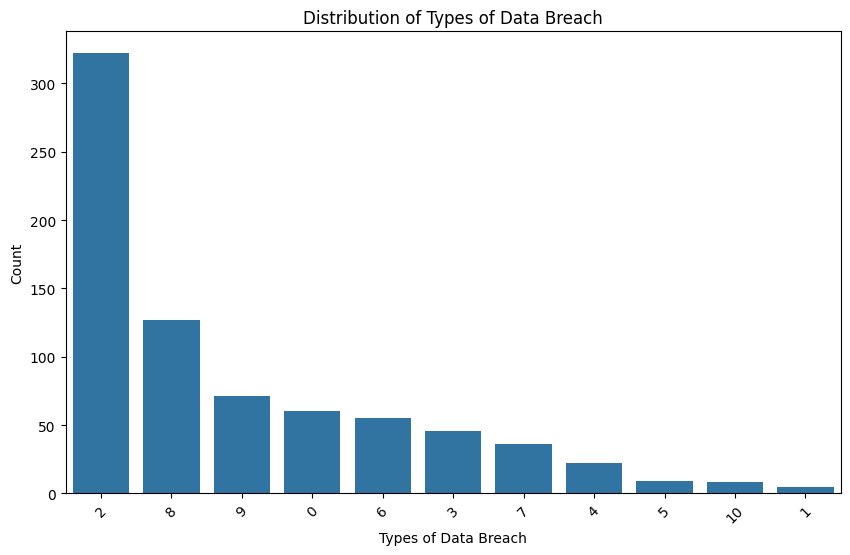

In [ ]:
#Distribution of Types of Data Breach ​
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x=DataDF['Types of Data Breach'], order=DataDF['Types of Data Breach'].value_counts().index)
plt.title('Distribution of Types of Data Breach')
plt.xlabel('Types of Data Breach')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


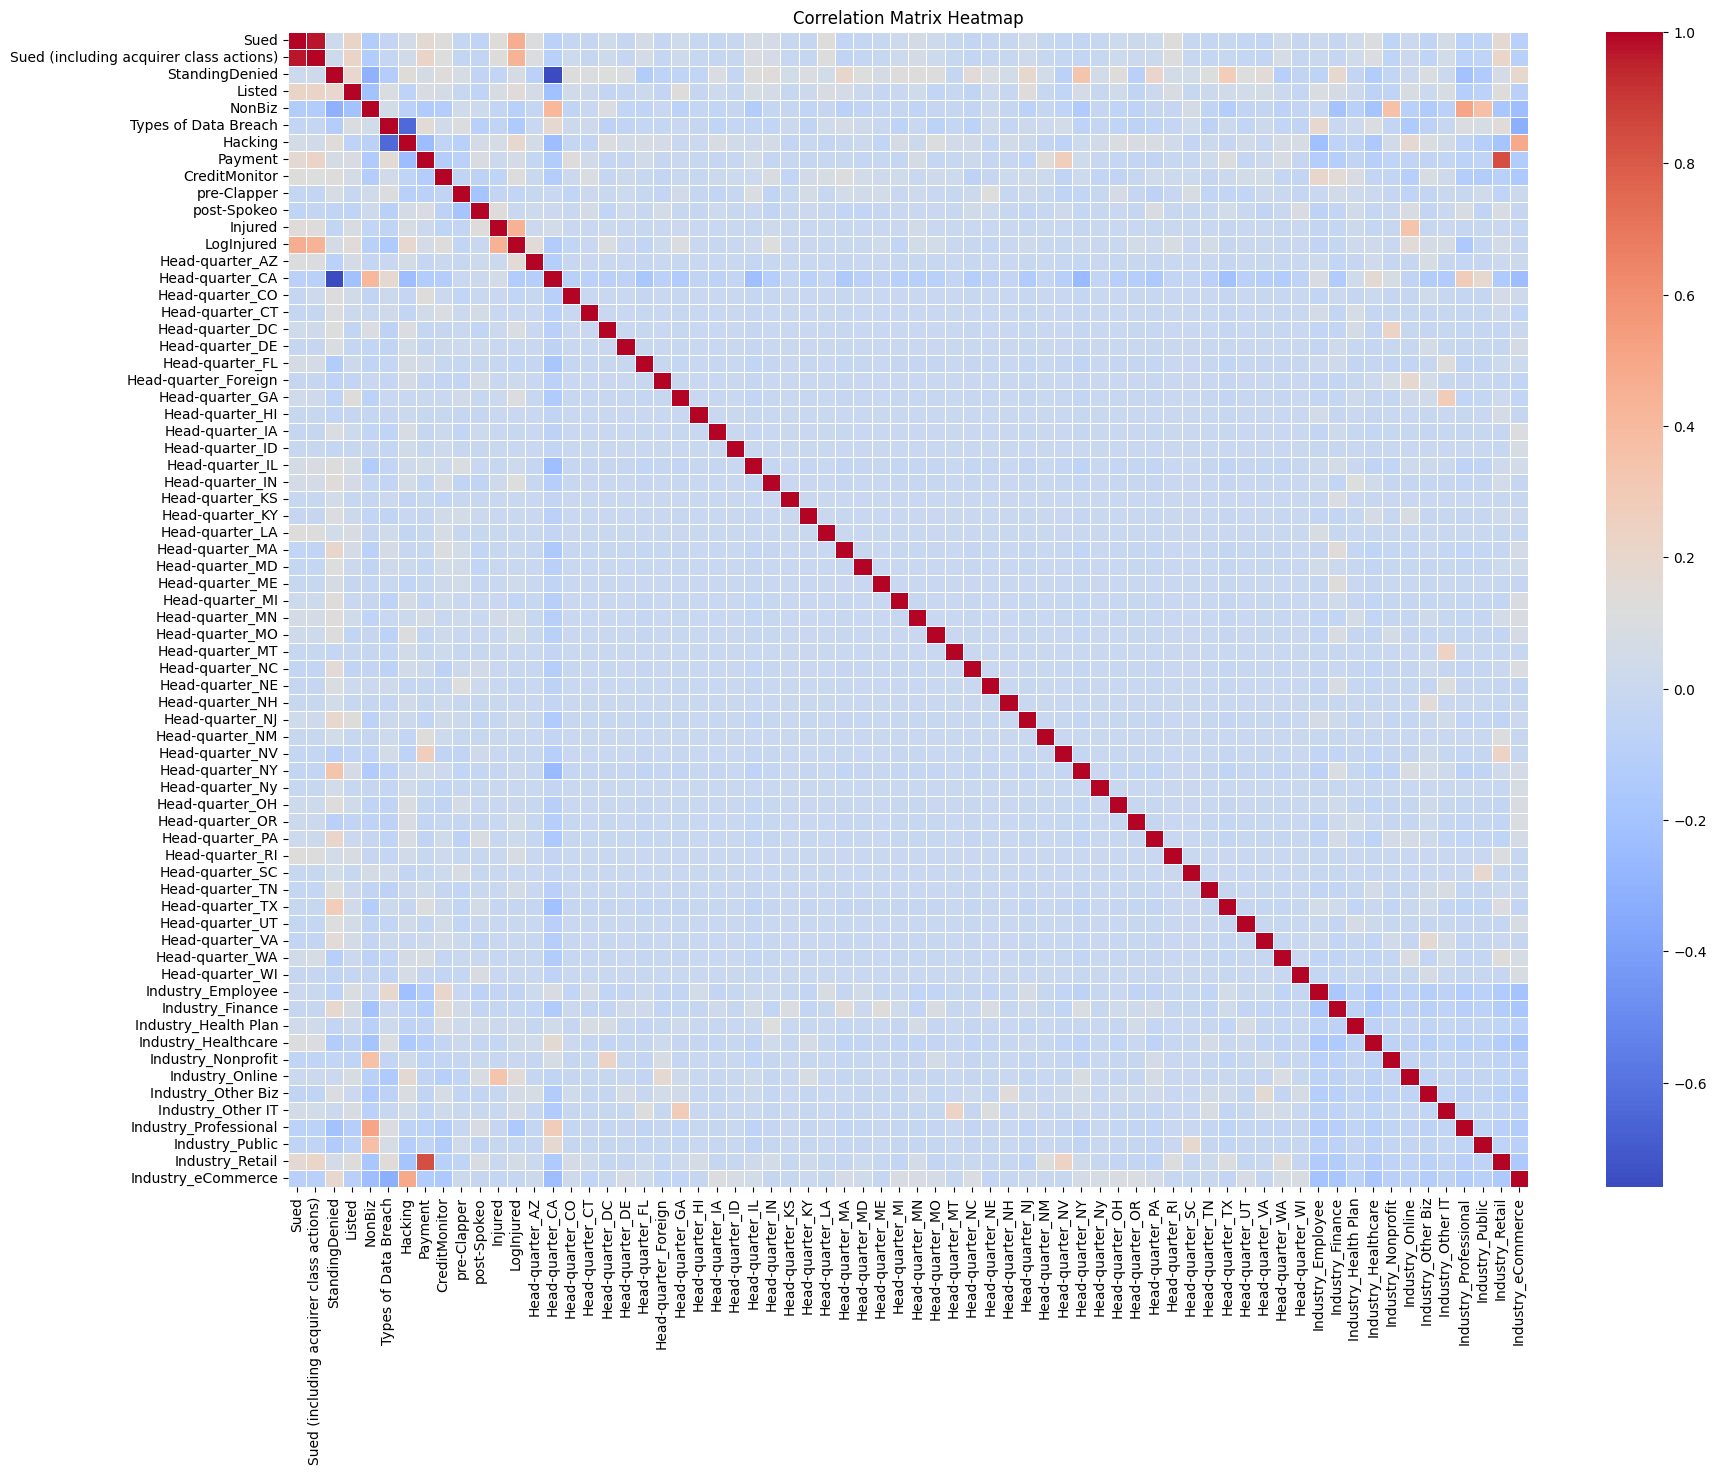

In [ ]:
#Correlation Matrix and Heatmap

# Finding the correlation matrix
# Selecting the numeric columns for correlation calculation
NumericData = DataDF.select_dtypes(include=['number'])
CorrelationMatrix = NumericData.corr()

# Setting the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot the heatmap
sns.heatmap(CorrelationMatrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


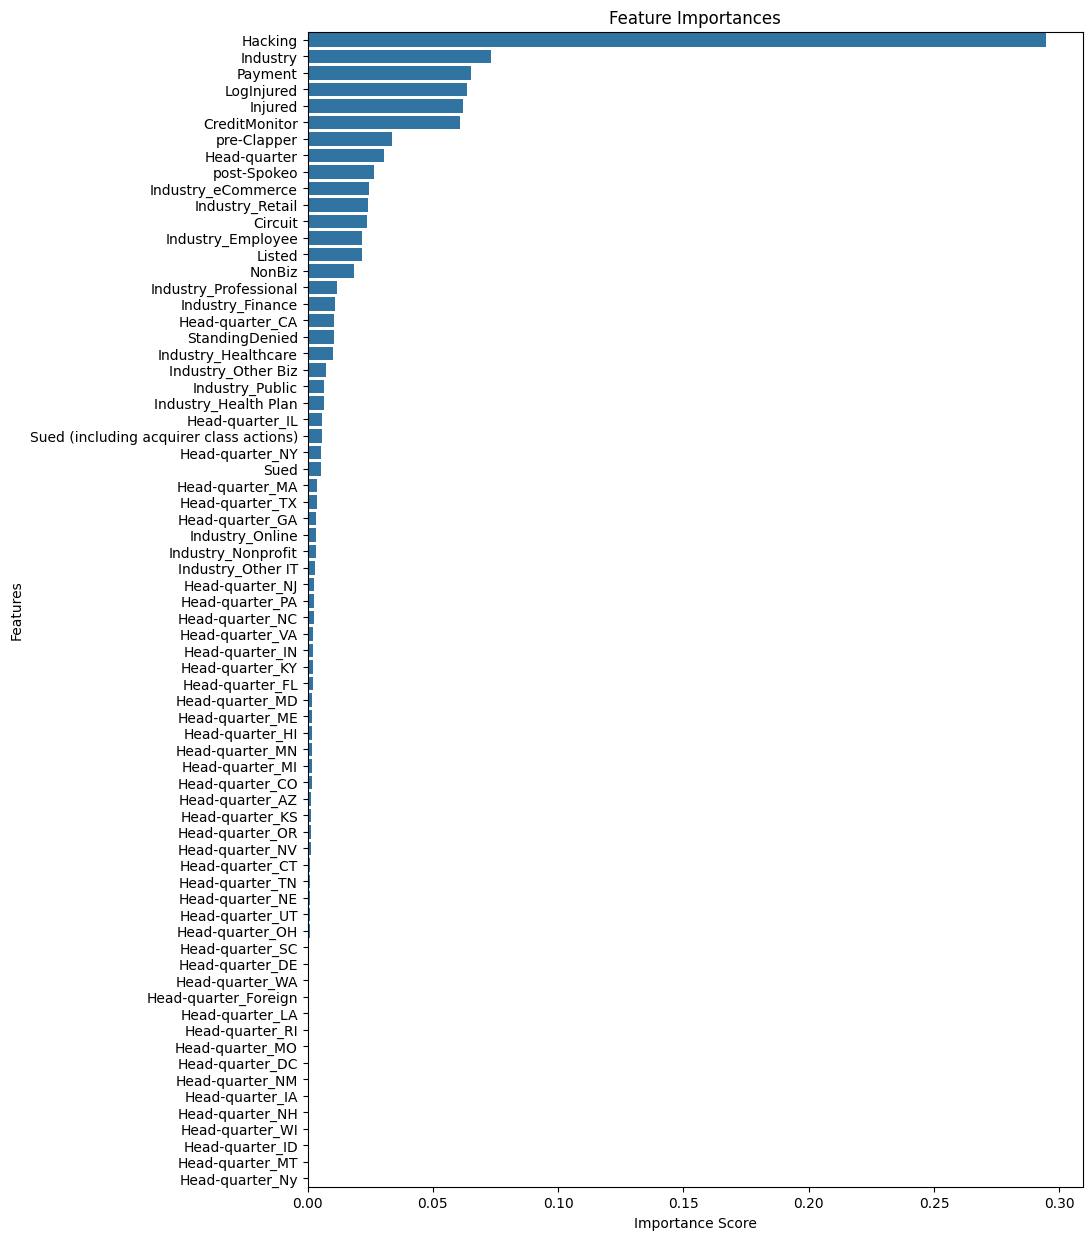

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Preparation of the feature and target variable data
X = DataDF.drop(columns=['Name', 'Filing Date', 'Types of Data Breach'])
y = DataDF['Types of Data Breach']

# Selecting the remaining categorical columns in X and encode them
LabelEncoder = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    # Conversion of the column into string type before encoding
    X[col] = X[col].astype(str)  # Conversion into string type
    X[col] = LabelEncoder.fit_transform(X[col])

# Initialization and training a Random Forest Classifier
RFModel = RandomForestClassifier(n_estimators=100, random_state=42)
RFModel.fit(X, y)

# Get feature importances
FeatureImportances = pd.Series(RFModel.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualisation of the feature importances
plt.figure(figsize=(10, 15))
sns.barplot(x=FeatureImportances, y=FeatureImportances.index)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

**4. Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

# Spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((608, 70), (153, 70), (608,), (153,))

In [ ]:
#Model Training
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Set and train the Decision Tree Classifier
DTModel = DecisionTreeClassifier(random_state=42)
DTModel.fit(X_train, y_train)

# Prediction on the test set
y_pred_dt = DTModel.predict(X_test)

# Model Evaluation
print('Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt, zero_division=0))

Decision Tree Classifier
Accuracy: 0.673202614379085
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.33      0.31        12
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        65
           3       0.25      0.33      0.29         9
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        11
           7       0.50      0.57      0.53         7
           8       0.52      0.50      0.51        26
           9       0.21      0.21      0.21        14
          10       0.00      0.00      0.00         2

    accuracy                           0.67       153
   macro avg       0.34      0.36      0.35       153
weighted avg       0.66      0.67      0.67       153



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialise and train the Logistic Regression model
LRModel = LogisticRegression(max_iter=1000, random_state=42)
LRModel.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = LRModel.predict(X_test)

# Evaluate the model
print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Classification Report:\n', classification_report(y_test, y_pred_lr, zero_division=0))




Logistic Regression
Accuracy: 0.42483660130718953
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00         1
           2       0.42      1.00      0.60        65
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        26
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00         2

    accuracy                           0.42       153
   macro avg       0.04      0.09      0.05       153
weighted avg       0.18      0.42      0.25       153



In [ ]:
# Initialize and train the Random Forest Classifier
RFModel = RandomForestClassifier(n_estimators=100, random_state=42)
RFModel.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = RFModel.predict(X_test)

# Evaluate the model
print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest Classifier
Accuracy: 0.673202614379085
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.17      0.20        12
           1       0.00      0.00      0.00         1
           2       0.96      1.00      0.98        65
           3       0.23      0.33      0.27         9
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        11
           7       0.43      0.43      0.43         7
           8       0.54      0.58      0.56        26
           9       0.27      0.29      0.28        14
          10       0.00      0.00      0.00         2

    accuracy                           0.67       153
   macro avg       0.33      0.34      0.34       153
weighted avg       0.65      0.67      0.66       153



In [ ]:
#Application of SMOTE to the imbalance dataset
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42, k_neighbors=3) # Set k_neighbors
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Show the new data breach types distribution
print(y_train_smote.value_counts())

Types of Data Breach
2     257
9     257
8     257
3     257
6     257
0     257
4     257
1     257
7     257
10    257
5     257
Name: count, dtype: int64


In [ ]:
#Hyperparameter tuning using Grid Search
from sklearn.model_selection import train_test_split, GridSearchCV
# Defining the parameter grid for Decision Tree (DT) model
ParamGridDT = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Defining the parameter grid for Logistic Regression (LR) model
ParamGridLR = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Defining the parameter grid for Random Forest (RF) model
ParamGridRF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Decision Tree Classifier
Accuracy: 0.6405228758169934
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.17      0.21        12
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        65
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        11
           7       0.62      0.71      0.67         7
           8       0.45      0.38      0.42        26
           9       0.24      0.36      0.29        14
          10       0.00      0.00      0.00         2

    accuracy                           0.64       153
   macro avg       0.33      0.33      0.33       153
weighted avg       0.65      0.64      0.64       153



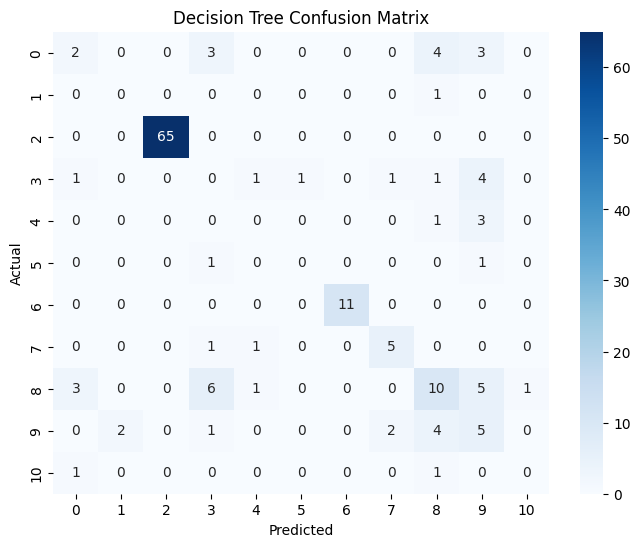

Logistic Regression Classifier
Accuracy: 0.12418300653594772
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00         1
           2       1.00      0.12      0.22        65
           3       0.07      0.22      0.10         9
           4       0.03      0.75      0.07         4
           5       0.00      0.00      0.00         2
           6       0.08      0.09      0.09        11
           7       0.00      0.00      0.00         7
           8       0.31      0.19      0.24        26
           9       0.00      0.00      0.00        14
          10       0.00      0.00      0.00         2

    accuracy                           0.12       153
   macro avg       0.14      0.13      0.06       153
weighted avg       0.49      0.12      0.15       153



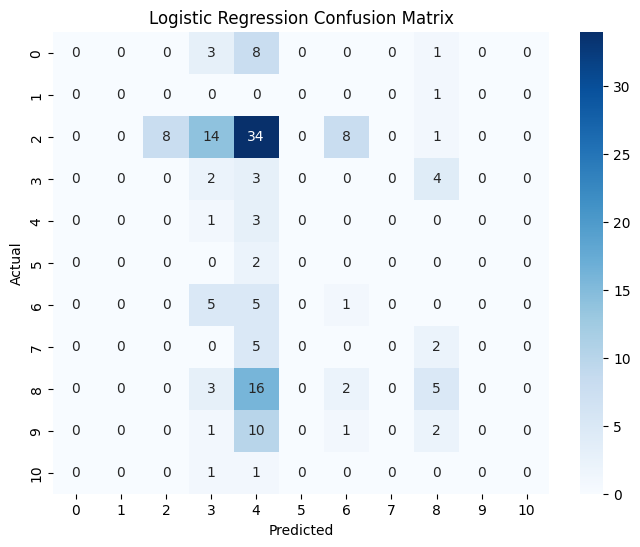

Random Forest Classifier
Accuracy: 0.673202614379085
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.17      0.24        12
           1       0.00      0.00      0.00         1
           2       0.96      1.00      0.98        65
           3       0.17      0.22      0.19         9
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        11
           7       0.50      0.57      0.53         7
           8       0.54      0.54      0.54        26
           9       0.31      0.36      0.33        14
          10       0.00      0.00      0.00         2

    accuracy                           0.67       153
   macro avg       0.35      0.35      0.35       153
weighted avg       0.66      0.67      0.66       153



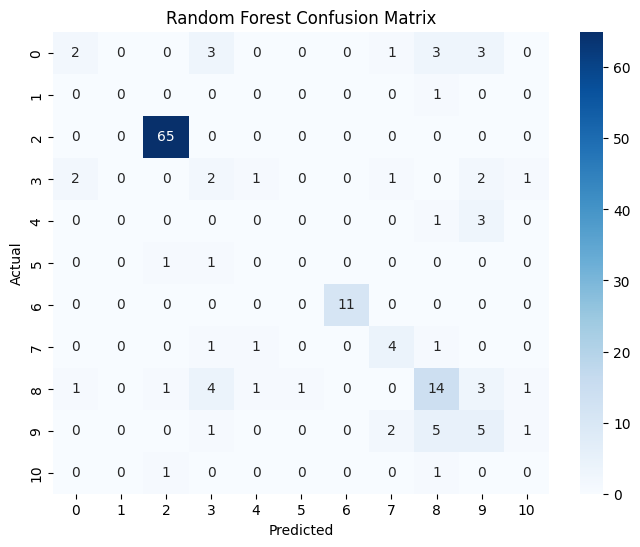

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np

# Model Initialization
DTModel = DecisionTreeClassifier(random_state=42)
LRModel = LogisticRegression(max_iter=1000, random_state=42)
RFModel = RandomForestClassifier(n_estimators=100, random_state=42)

# Performing Grid Search
def PerformGridSearch(model, param_grid, X_train, y_train):
    GridSearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    GridSearch.fit(X_train, y_train)
    return GridSearch.best_estimator_

BestDT = PerformGridSearch(DTModel, ParamGridDT, X_train_smote, y_train_smote)
BestLR = PerformGridSearch(LRModel, ParamGridLR, X_train_smote, y_train_smote)
BestRF = PerformGridSearch(RFModel, ParamGridRF, X_train_smote, y_train_smote)

# Model Training and Evaluation
def TrainEvaluate(model, X_train, y_train, X_test, y_test, ModelName):
    model.fit(X_train, y_train)
    yprediction = model.predict(X_test)
    print(f'{ModelName} Classifier')
    print('Accuracy:', accuracy_score(y_test, yprediction))
    print('Classification Report:\n', classification_report(y_test, yprediction, zero_division=0))
    return yprediction

def ConfusionMatrixPlot(y_test, yprediction, ModelName):
    cm = confusion_matrix(y_test, yprediction)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{ModelName} Confusion Matrix')
    plt.show()

# Evaluating the Predictive Model - Decision Tree (DT)
ypred_dt = TrainEvaluate(BestDT, X_train_smote, y_train_smote, X_test, y_test, 'Decision Tree')
ConfusionMatrixPlot(y_test, ypred_dt, 'Decision Tree')

# Evaluating the Predictive Model - Logistic Regression (LR)
ypred_lr = TrainEvaluate(BestLR, X_train_smote, y_train_smote, X_test, y_test, 'Logistic Regression')
ConfusionMatrixPlot(y_test, ypred_lr, 'Logistic Regression')

# Evaluating the Predictive model - Random Forest (RF)
ypred_rf = TrainEvaluate(BestRF, X_train_smote, y_train_smote, X_test, y_test, 'Random Forest')
ConfusionMatrixPlot(y_test, ypred_rf, 'Random Forest')


In [ ]:
# #Model Retraining and Re-evaluating

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Initialize models
# dt_model = DecisionTreeClassifier(random_state=42)
# lr_model = LogisticRegression(max_iter=1000, random_state=42)
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Perform Grid Search for Decision Tree
# grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')
# grid_search_dt.fit(X_train_smote, y_train_smote)
# best_dt = grid_search_dt.best_estimator_

# # Perform Grid Search for Logistic Regression
# grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5, n_jobs=-1, scoring='accuracy')
# grid_search_lr.fit(X_train_smote, y_train_smote)
# best_lr = grid_search_lr.best_estimator_

# # Perform Grid Search for Random Forest
# grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
# grid_search_rf.fit(X_train_smote, y_train_smote)
# best_rf = grid_search_rf.best_estimator_

# # Train and evaluate Decision Tree
# dt_model.fit(X_train_smote, y_train_smote) #Training the model
# y_pred_dt = dt_model.predict(X_test) #predict on the test set
# print('Decision Tree Classifier') # Evaluate the model
# print('Accuracy:', accuracy_score(y_test, y_pred_dt))
# print('Classification Report:\n', classification_report(y_test, y_pred_dt, zero_division=0))


# # Train and evaluate Logistic Regression
# lr_model.fit(X_train_smote, y_train_smote) #Training the model
# y_pred_lr = lr_model.predict(X_test) #Predict on the test set
# print('Logistic Regression') #Evaluate the model
# print('Accuracy:', accuracy_score(y_test, y_pred_lr))
# print('Classification Report:\n', classification_report(y_test, y_pred_lr, zero_division=0))


# # Train and evaluate Random Forest
# rf_model.fit(X_train_smote, y_train_smote) #Training the model
# y_pred_rf = rf_model.predict(X_test) #Predict on the test set
# print('Random Forest Classifier') #Evaluate the model
# print('Accuracy:', accuracy_score(y_test, y_pred_rf))
# print('Classification Report:\n', classification_report(y_test, y_pred_rf, zero_division=0))
